## 1. importing important libraries 

In [68]:
import pandas as pd 
import numpy as np 

## 2. Reading data set 

In [69]:
data=pd.read_csv(r"C:\Users\SAKET NANDAN\Documents\current_hackathon\backorder_prediction\Back order prediction\Training_Dataset_v2.csv")

C:\Users\SAKET NANDAN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
#data

In [71]:
#data.isnull().mean()

In [72]:
data.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

###### Here,if we see then except  the sku(product_id) all columns except lead_time have 1 missing and lead_time have high missing values, we will impute with some technique after EDA

In [73]:
#we presenting all the columns given here 
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [74]:
#what is the varaible types and non-null count for each variables we r presenting here 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [75]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype =='O']

print('There are {} categorical variables in training set.\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 8 categorical variables in training set.

The categorical variables are : ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


In [76]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype !='O']

print('There are {} numerical variables in training set.\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 15 numerical variables in training set.

The numerical variables are : ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


Text(0, 0.5, 'counts')

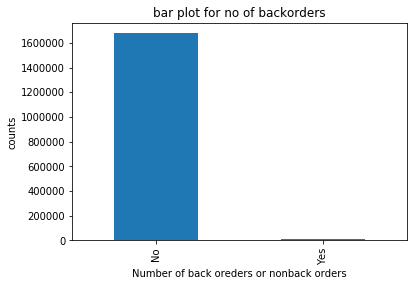

In [77]:
#here  i m ploting the bar graph for went_on_backorder to identify the counting of backorder or not 
fig = data['went_on_backorder'].value_counts().plot.bar()
fig.set_title('bar plot for no of backorders')
fig.set_xlabel('Number of back oreders or nonback orders')
fig.set_ylabel('counts')


###### so, here we can see our target variable is highly imbalance 

In [78]:
import seaborn as sns


Text(0, 0.5, 'counts')

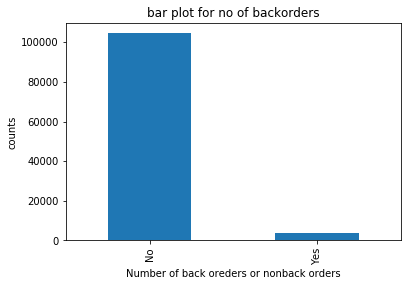

In [79]:
1.1#inventory level:- The current amount of a product that a business has in stock.
#here i m showing the impact of products whose stock is zero with back_order 
p=data[data['national_inv']==0]
fig = p['went_on_backorder'].value_counts().plot.bar()
fig.set_title('bar plot for no of backorders')
fig.set_xlabel('Number of back oreders or nonback orders')
fig.set_ylabel('counts')


###### there are huge numbersof products whose amount in stock is 0 but its not in backorder category in comparision to back_order category 

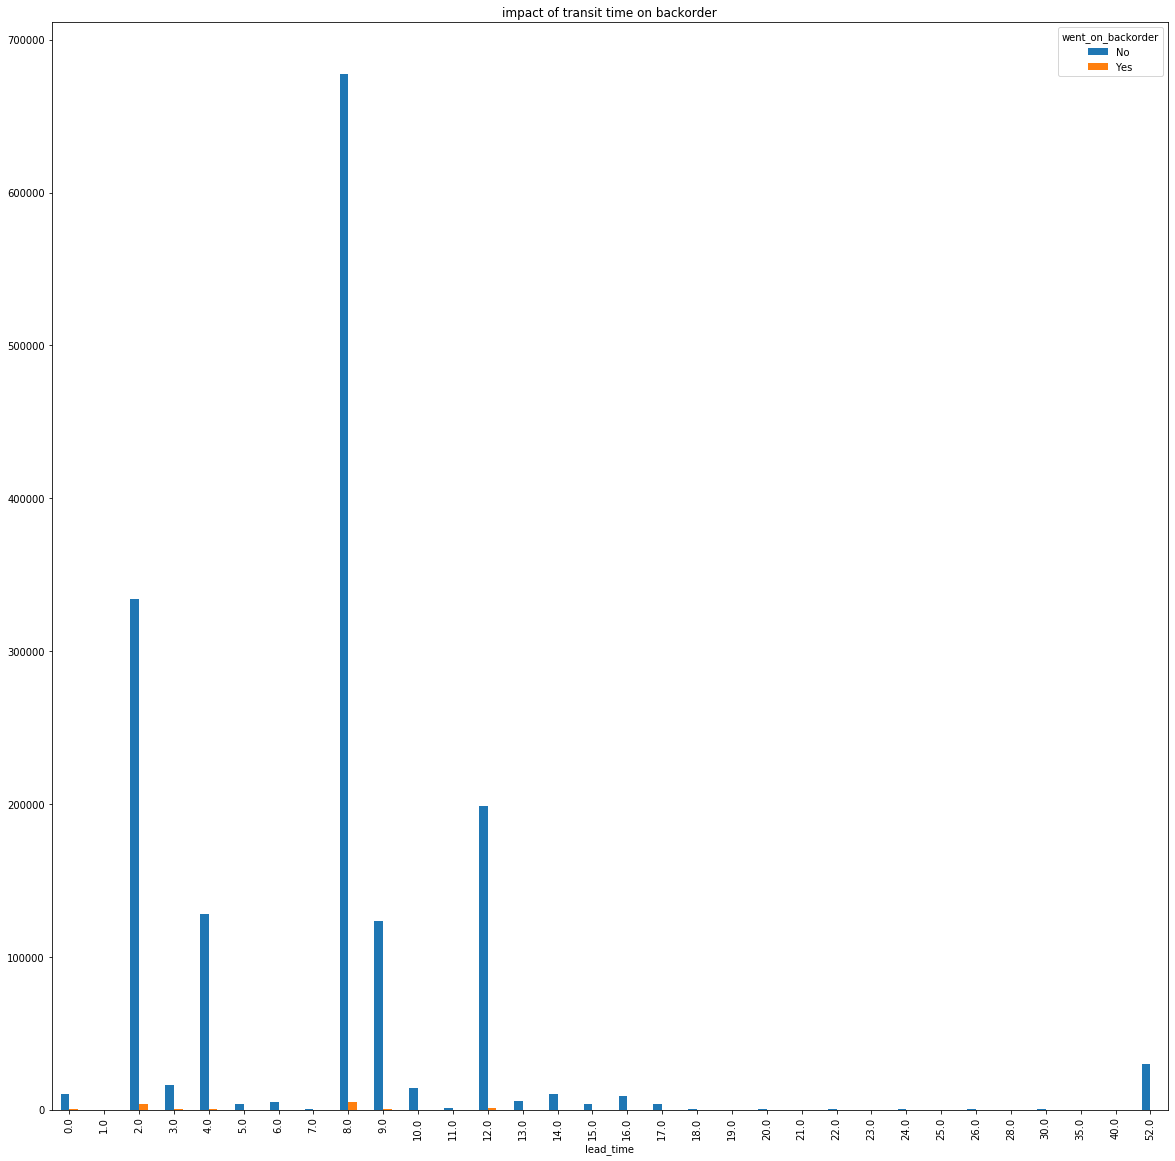

In [80]:
#1.2 The transit time is the time in days that is required to deliver goods from our  premises to the customer location. 
pd.crosstab(data.lead_time,data.went_on_backorder).plot(kind='bar',title='impact of transit time on backorder',figsize=(20,20))

###### if we see the insight then most of favourable transit time 8 days , then 2 days ,then 12 days , we can conclude that within 12 days company should deliver the product for customer satisfaction 

In [81]:
#1.3 in_transit_qty – 	Amount of product in transit from source

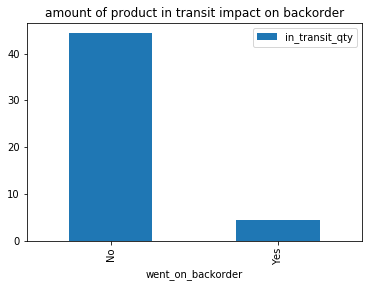

In [82]:
d=data.pivot_table(index='went_on_backorder',aggfunc={'in_transit_qty':'mean'})
d.plot.bar(title='amount of product in transit impact on backorder')



###### those product went in backorder list on avarage 3 products are in_transit

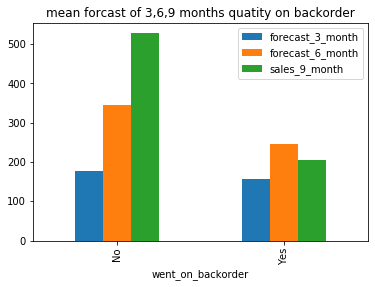

In [83]:
#1.4 what is the impact of 3,6,9 months avg forcast of each product on backorder and non-backorder
d=data.pivot_table(index='went_on_backorder',aggfunc={'forecast_3_month':'mean','forecast_6_month':'mean','sales_9_month':'mean'})
d.plot.bar(title='mean forcast of 3,6,9 months quatity on backorder')



###### so from here we can conclude that products went on backorder whose 6 months avg forcasting is highest , so in order to fix up the stock for these product we should keep in mind for demand for next 6-9 months 

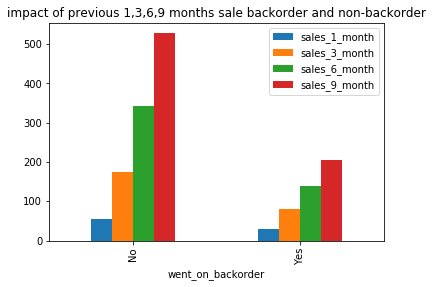

In [84]:
#1.5 what is the impact of previous 1,3,6,9 months sale backorder and non-backorder
d=data.pivot_table(index='went_on_backorder',aggfunc={'sales_1_month':'mean','sales_3_month':'mean','sales_6_month':'mean','sales_9_month':'mean'})
d.plot.bar(title='impact of previous 1,3,6,9 months sale backorder and non-backorder')



###### if we see the above plot then items went on backorder have less demand in comparision non backorder 

In [85]:
data.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [86]:
numerical

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

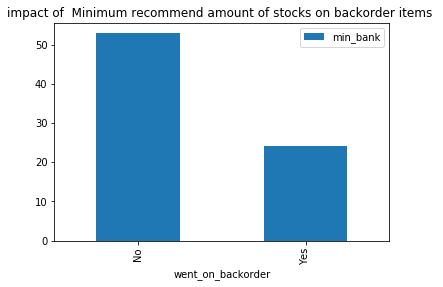

In [87]:
#1.6 min_bank –Minimum recommend amount to stock
#relationship b/w  Minimum recommend amount to stock to backorder items 
d=data.pivot_table(index='went_on_backorder',aggfunc={'min_bank':'mean'})
d.plot.bar(title='impact of  Minimum recommend amount of stocks on backorder items ')


###### Here ,if we see the average no recomended amount of stock for went_on_backorder is nearly half of went_on_non-backorder

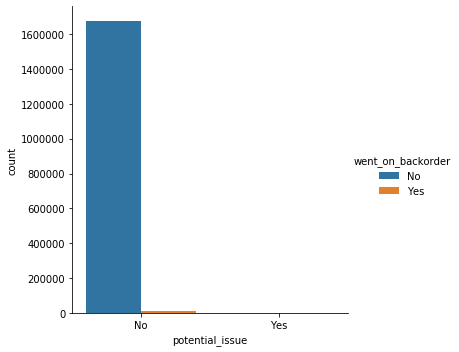

In [88]:
#1.7 potential_issue – 	Source issue for part identified
# so ,we will plot the ralationship with item went on backorder 

sns.catplot(x='potential_issue',data=data,hue='went_on_backorder',kind='count')


###### those item whose source issue is identified is nearly 0 for both backorder and non-backorder , it means after identifying issue organization did not send these items in market , but there nearly 10-12k products whose issue has not identified also went_on_backorder , so organizations step should be to identify the issue 

Text(0, 0.5, 'counts of products went on overdue from source')

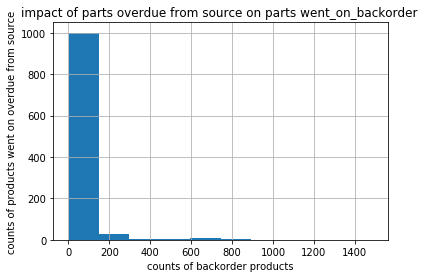

In [103]:
#1.8 pieces_past_due – 	Parts overdue from source
#what is the impact of parts overdue from source on parts went_on_backorder 
p=data[data['pieces_past_due']!=0]#finding only for products whose counts for parts overdue from source are not 0
r=p[p['went_on_backorder']=='Yes'] #here we r grouping only backorder products 
fig = r.pieces_past_due.hist(bins=10)
fig.set_title('impact of parts overdue from source on parts went_on_backorder ')
fig.set_xlabel('counts of backorder products')
fig.set_ylabel('counts of products went on overdue from source')

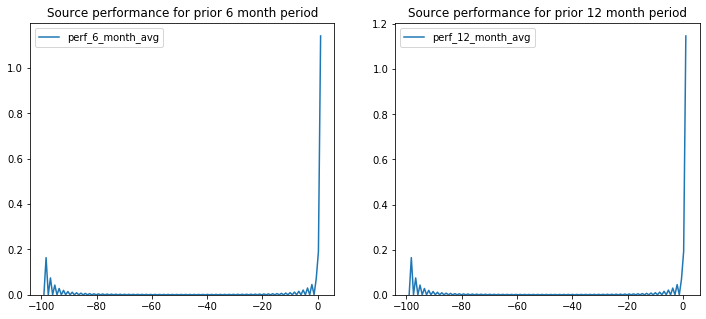

In [115]:
#1.9 source performance prior 6 and 12 month on went_on_backorder
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('Source performance for prior 6 month period')
sns.kdeplot(data['perf_6_month_avg'], ax=ax1)
ax2.set_title('Source performance for prior 12 month period')
sns.kdeplot(data['perf_12_month_avg'], ax=ax2)


###### we can conclude that source performance is similar for both 12 month and 6 month prior 

Text(0, 0.5, 'counts of stock orders went on overdue from source')

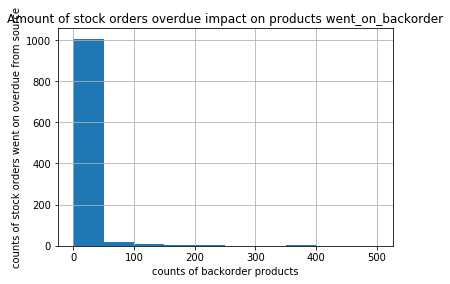

In [124]:
#1.10 Amount of stock orders overdue impact on products went_on_backorder
fig = r.local_bo_qty.hist(bins=10)
fig.set_title('Amount of stock orders overdue impact on products went_on_backorder')
fig.set_xlabel('counts of backorder products')
fig.set_ylabel('counts of stock orders went on overdue from source')

